<h1> 3 layer Deep neural network </h1>

Stream Multispectral image shape:  (3, 66, 285)
Stream Binary stream image shape:  (66, 285)
test_features_ruposhi_stream Multispectral image shape:  (3, 180, 70)
The "changeDimension()" function has moved to "array_to_table()" and will be deprecated in future versions. Please check the pyrsgis documentation at https://pyrsgis.readthedocs.io/en/master/ for more details.
The "changeDimension()" function has moved to "array_to_table()" and will be deprecated in future versions. Please check the pyrsgis documentation at https://pyrsgis.readthedocs.io/en/master/ for more details.
The "changeDimension()" function has moved to "array_to_table()" and will be deprecated in future versions. Please check the pyrsgis documentation at https://pyrsgis.readthedocs.io/en/master/ for more details.
Stream Multispectral image shape:  (18810, 3)
Stream Binary stream image shape:  (18810,)
test_features_ruposhi_stream Multispectral image shape:  (12600, 3)
(11286, 3)
(11286,)
(7524, 3)
(7524,)
(11286, 1, 

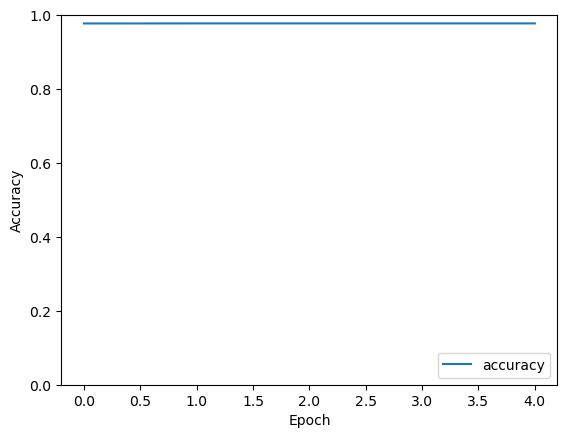

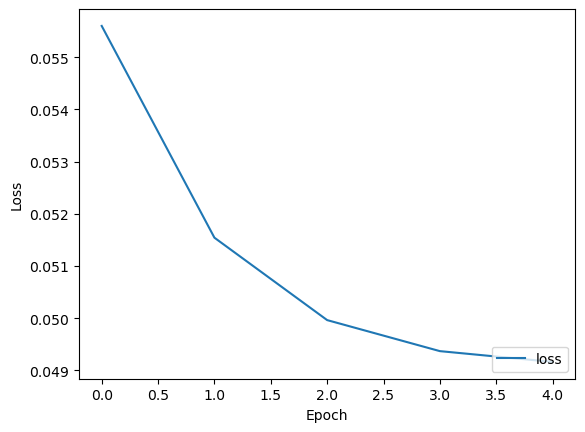

236/236 [==============================] - 1s 3ms/step
Confusion matrix: for 14 nodes
 [[6830  183]
 [   0  511]]

P-Score: 0.736, R-Score: 1.000
394/394 [==============================] - 2s 4ms/step


In [61]:
#single deep neural network 
import os
import numpy as np
from tensorflow import keras
from pyrsgis import raster
from pyrsgis.convert import changeDimension
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
# Change the directory
os.chdir(r"C:\Users\user\OneDrive\MS thesis\Result\python coding")

# Assign file names
x_train_st_features = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\All streams image with Indices\khoiyaChora_nd_vi_mi_wi_2022.tif"
y_train_st_labels = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\raster_of_buffered_streams\khoiyaChora_buffer_image.tif"
test_ruposhi_stream = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\All streams image with Indices\Ruposhi_nd_vi_mi_wi_2022.tif"
test_ruposhi_stream= r"C:\Users\user\OneDrive\MS thesis\Result\GEE\testing image\roi_nd_vi_mi_wi_2022.tif"
# Read the rasters as array
ds1, featuresStream = raster.read(x_train_st_features, bands='all')
ds2, labelStream = raster.read(y_train_st_labels, bands=1)
ds3, features_ruposhi_stream = raster.read(test_ruposhi_stream, bands='all')

# Print the size of the arrays
print("Stream Multispectral image shape: ", featuresStream.shape)
print("Stream Binary stream image shape: ", labelStream.shape)
print("test_features_ruposhi_stream Multispectral image shape: ", features_ruposhi_stream.shape)

# Clean the labelled data to replace NoData values by zero
labelStream = (labelStream == 1).astype(int)

# Reshape the array to single dimensional array
featuresStream = changeDimension(featuresStream)
labelStream = changeDimension (labelStream)
features_ruposhi_stream = changeDimension(features_ruposhi_stream)
nBands = featuresStream.shape[1]

print("Stream Multispectral image shape: ", featuresStream.shape)
print("Stream Binary stream image shape: ", labelStream.shape)
print("test_features_ruposhi_stream Multispectral image shape: ", features_ruposhi_stream.shape)

# Split testing and training datasets
xTrain, xTest, yTrain, yTest = train_test_split(featuresStream, labelStream, test_size=0.4, random_state=42)

print(xTrain.shape)
print(yTrain.shape)

print(xTest.shape)
print(yTest.shape)

# Normalise the data
xTrain = xTrain / 255.0
xTest = xTest / 255.0
features_ruposhi_stream = features_ruposhi_stream / 255.0

# Reshape the data
xTrain = xTrain.reshape((xTrain.shape[0], 1, xTrain.shape[1]))
xTest = xTest.reshape((xTest.shape[0], 1, xTest.shape[1]))
features_ruposhi_stream = features_ruposhi_stream.reshape((features_ruposhi_stream.shape[0], 1, features_ruposhi_stream.shape[1]))

# Print the shape of reshaped data
print(xTrain.shape, xTest.shape, features_ruposhi_stream.shape)

# Define the parameters of the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1, nBands)),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(2, activation='softmax')])

# Define the accuracy metrics and parameters
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Run the model
history = model.fit(xTrain, yTrain, epochs=5)
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()


# Predict for test data 
yTestPredicted = model.predict(xTest)
yTestPredicted = yTestPredicted[:,1]

# Calculate and display the error metrics
yTestPredicted = (yTestPredicted>0.5).astype(int)
cMatrix = confusion_matrix(yTest, yTestPredicted)
pScore = precision_score(yTest, yTestPredicted)
rScore = recall_score(yTest, yTestPredicted)

print("Confusion matrix: for 14 nodes\n", cMatrix)
print("\nP-Score: %.3f, R-Score: %.3f" % (pScore, rScore))

predicted = model.predict(features_ruposhi_stream)
predicted = predicted[:,1]

# Predict new data and export the probability raster
prediction = np.reshape(predicted, (ds3.RasterYSize, ds3.RasterXSize))
outFile = 'test_features_ruposhi_stream_predicted.tif'
raster.export(prediction, ds3, filename=outFile, dtype='float')

In [26]:
# #predicted image 
# import rasterio as rs
# from rasterio.plot import show
# pred_img = rs.open(r"C:\Users\user\OneDrive\MS thesis\Result\python coding\test_features_ruposhi_stream_predicted.tif")
# show(pred_img,title="predicted image")
# real_img = rs.open(r"C:\Users\user\OneDrive\MS thesis\Result\GEE\All streams image with Indices\Ruposhi_nd_vi_mi_wi_2022.tif")
# show(real_img,title="real image")

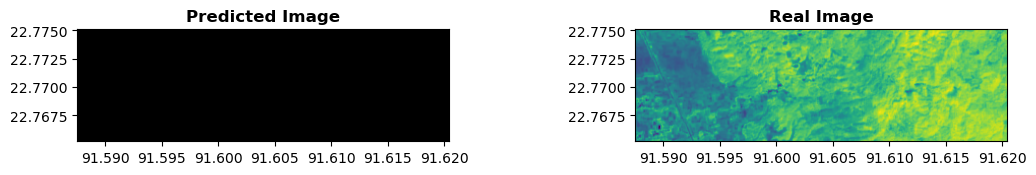

In [58]:
import rasterio as rs
from rasterio.plot import show
import matplotlib.pyplot as plt

# Open the predicted and real images
pred_img = rs.open(r"C:\Users\user\OneDrive\MS thesis\Result\python coding\test_features_ruposhi_stream_predicted.tif")
# real_img = rs.open(r"C:\Users\user\OneDrive\MS thesis\Result\GEE\All streams image with Indices\Ruposhi_nd_vi_mi_wi_2022.tif")
real_img = rs.open(r"C:\Users\user\OneDrive\MS thesis\Result\GEE\testing image\roi_nd_vi_mi_wi_2022.tif")
# Plot the images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the predicted image on the left
show(pred_img, ax=ax1, title="Predicted Image", cmap='gray')

# Display the real image on the right
show(real_img, ax=ax2, title="Real Image", cmap='viridis')
# Adjust the layout to reduce the gap
plt.subplots_adjust(wspace=0.5)
# Show the plot
plt.show()


<h1> Processing of Satelltite imagery which are exported from GEE to train CNN </h1>


<h3> Below part shows the code to get the list off all of all file in a folder which end with same extension </h3>

In [35]:
#getting the list of all files in a folder which end with same extension

import os

def list_tiff_files(buf_shape_directory_path):
    # List all files in the directory
    all_buf_shape_files = os.listdir(buf_shape_directory_path)

    # Filter only the TIFF files
    shape_files = [file for file in all_buf_shape_files if file.lower().endswith('.shp')]

    # Return the list of TIFF files
    return shape_files

if __name__ == "__main__":
    buf_shape_directory_path = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\all_streams_buffer"

    shape_files_list = list_tiff_files(buf_shape_directory_path)

    # Print the array of TIFF files
    print("List of shape  files:")
    print(shape_files_list)
# ['boalia_nd_vi_mi_wi_2022.tif', 'eco_park_sohosradhara_nd_vi_mi_wi_2022.tif', 'khoiyaChora_nd_vi_mi_wi_2022.tif', 'Ruposhi_nd_vi_mi_wi_2022.tif', 'Sohosrodhara_nd_vi_mi_wi_2022.tif', 'sonaichari_nd_vi_mi_wi_2022.tif', 'suptodhara_nd_vi_mi_wi_2022.tif']
#['boalia_buffer.shp', 'eco_park_sohosradhara_buffer.shp', 'khoiyaChora_buffer.shp', 'Ruposhi_buffer.shp', 'Sohosrodhara_buffer.shp', 'sonaichari_buffer.shp', 'suptodhara_buffer.shp']


List of shape  files:
['boalia_buffer.shp', 'eco_park_sohosradhara_buffer.shp', 'khoiyaChora_buffer.shp', 'Ruposhi_buffer.shp', 'Sohosrodhara_buffer.shp', 'sonaichari_buffer.shp', 'suptodhara_buffer.shp']


<h3> Below part shows the code to rasterize vector shape files of stream buffer by using 
    geotile library </h3>

In [ ]:
#rasterize vector shape files of streams 
import os 
from geotile import GeoTile 
import rasterio as rs 
from rasterio.plot import show 
stream_indice_images_dir = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\All streams image with Indices"
stream_buffer_shape_dir = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\all_streams_buffer"
stream_indice_images = ['boalia_nd_vi_mi_wi_2022.tif', 'eco_park_sohosradhara_nd_vi_mi_wi_2022.tif', 'khoiyaChora_nd_vi_mi_wi_2022.tif', 'Ruposhi_nd_vi_mi_wi_2022.tif', 'Sohosrodhara_nd_vi_mi_wi_2022.tif', 'sonaichari_nd_vi_mi_wi_2022.tif', 'suptodhara_nd_vi_mi_wi_2022.tif']
stream_buffer_shape = ['boalia_buffer.shp', 'eco_park_sohosradhara_buffer.shp', 'khoiyaChora_buffer.shp', 'Ruposhi_buffer.shp', 'Sohosrodhara_buffer.shp', 'sonaichari_buffer.shp', 'suptodhara_buffer.shp']
output_dir = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\raster_of_buffered_streams"

for i in range(len(stream_buffer_shape)):
    shapefile_name = os.path.splitext(stream_buffer_shape[i])[0]  # Extract shapefile name without extension
    output_filename = f"{shapefile_name}_image.tif"  # Construct output filename
    print(os.path.join(stream_buffer_shape_dir, stream_buffer_shape[i]))
    gt = GeoTile(os.path.join(stream_indice_images_dir, stream_indice_images[i]))
    gt.rasterization(os.path.join(stream_buffer_shape_dir, stream_buffer_shape[i]), os.path.join(output_dir, output_filename), no_data=0)



<h3> Below part shows code for chipping features and lables images and save as npy array 
by using geotile library </h3> 


In [ ]:
#chipping features and lables images and save as npy array 

from geotile import GeoTile
import os

stream_buf_image = ['boalia_buffer_image.tif', 'eco_park_sohosradhara_buffer_image.tif', 'khoiyaChora_buffer_image.tif', 'Ruposhi_buffer_image.tif', 'Sohosrodhara_buffer_image.tif', 'sonaichari_buffer_image.tif', 'suptodhara_buffer_image.tif']
stream_buf_image_dir = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\raster_of_buffered_streams"
stream_buf_image_npy_dir = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\stream_buf_image_chips_npy"
def np_array_from_raster(tif_list,input_dir,out_put_dir,x_or_y_train): 
    
    for i in range(len(tif_list)):
        PATH_train_Y = os.path.join(input_dir, tif_list[i])
        gt_train_y = GeoTile(PATH_train_Y)
        gt_train_y.generate_tiles(save_tiles=False,tile_x = 256, tile_y = 256, stride_x = 256, stride_y = 256)
    
        tif_file_name = os.path.splitext(tif_list[i])[0]
        output_filename = f"{tif_file_name}_{x_or_y_train}.npy" 
        gt_train_y.convert_nan_to_zero()
        gt_train_y.save_numpy(os.path.join(out_put_dir, output_filename))  
        
#call the funciton and generate npy array for each streams the buffer. it will be train_y
np_array_from_raster(stream_buf_image,stream_buf_image_dir,stream_buf_image_npy_dir,"train_y")

stream_indices_images = ['boalia_nd_vi_mi_wi_2022.tif', 'eco_park_sohosradhara_nd_vi_mi_wi_2022.tif', 'khoiyaChora_nd_vi_mi_wi_2022.tif', 'Ruposhi_nd_vi_mi_wi_2022.tif', 'Sohosrodhara_nd_vi_mi_wi_2022.tif', 'sonaichari_nd_vi_mi_wi_2022.tif', 'suptodhara_nd_vi_mi_wi_2022.tif']
stream_indices_img_dir = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\All streams image with Indices"
stream_indices_img_npy_dir = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\stream_indices_imge_chips_npy"
np_array_from_raster(stream_indices_images,stream_indices_img_dir,stream_indices_img_npy_dir,"train_x")


<h3> join the npy array of all stream buffer and stream indices image and save two major npy file 
</h3>

In [ ]:
#join the npy array of all stream buffer and stream indices image and save two major npy file 
import os
import numpy as np

def join_npy_files(input_folder, output_filename):
   
    # List all .npy files in the folder
    npy_files = [f for f in os.listdir(input_folder) if f.lower().endswith('.npy')]

    if not npy_files:
        print("No .npy files found in the specified folder.")
        return

    # Load and concatenate all .npy files
    result_array = np.concatenate([np.load(os.path.join(input_folder, npy_file)) for npy_file in npy_files], axis=0)

    # Save the concatenated array as a single .npy file
    output_path = os.path.join(input_folder, output_filename)
    np.save(output_path, result_array)

input_folder_path = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\stream_buf_image_chips_npy"
output_file_name = "all_stream_buf_image_chips_npy_(train_y).npy"

join_npy_files(input_folder_path, output_file_name)
join_npy_files(r"C:\Users\user\OneDrive\MS thesis\Result\GEE\stream_indices_imge_chips_npy","all_stream_indices_image_chipy_npy_(train_x).npy")

<h3> Plotting second image chips </h3>

(8, 256, 256, 3)


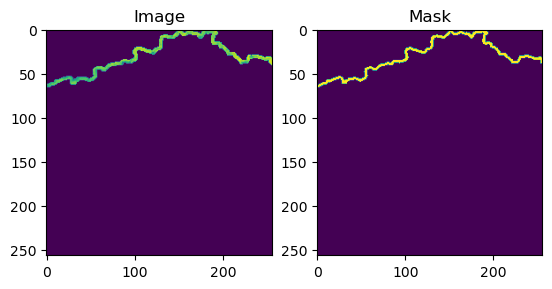

In [38]:
import matplotlib.pyplot as plt
X_train = np.load(r"C:\Users\user\OneDrive\MS thesis\Result\GEE\stream_indices_imge_chips_npy\all_stream_indices_image_chipy_npy_(train_x).npy")
Y_train = np.load(r"C:\Users\user\OneDrive\MS thesis\Result\GEE\stream_buf_image_chips_npy\all_stream_buf_image_chips_npy_(train_y).npy")
print(X_train.shape)
# Let's plot a sample input RGB image and output image with buildings
fig, (ax1, ax2) = plt.subplots(1,2)
# img = np.random.randint(0, 442)
# print(img)
ax1.imshow(X_train[2, :, :, :1])
ax2.imshow(Y_train[2, :, :, 0])
ax1.set_title("Image")
ax2.set_title('Mask')
plt.show()

<h3> Plotting 6 random image chips </h3>

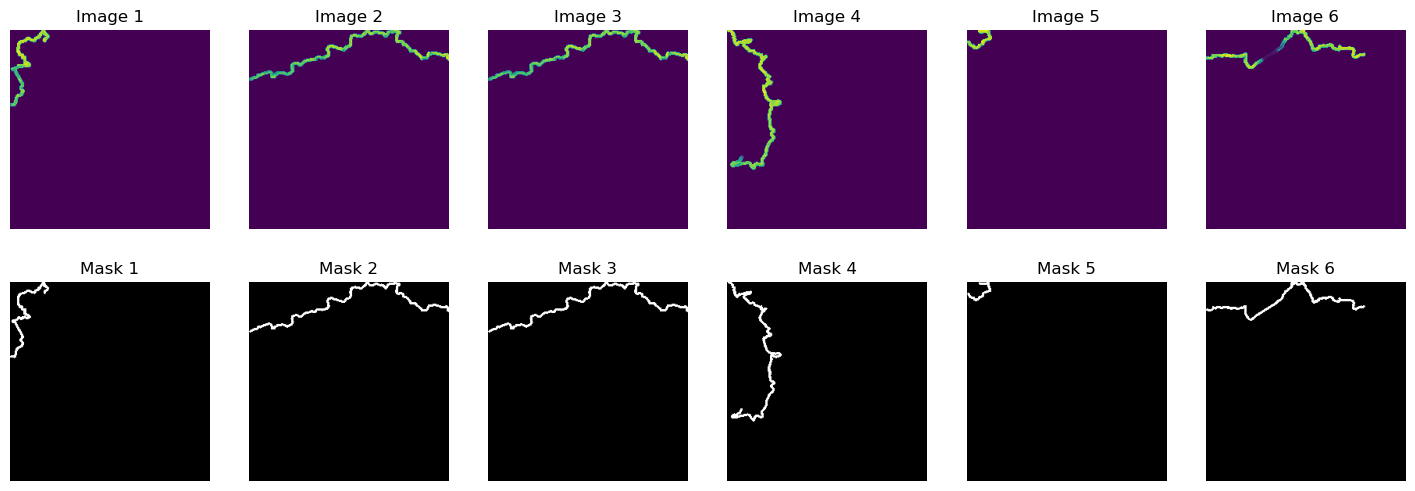

In [44]:
import matplotlib.pyplot as plt
import numpy as np

X_train = np.load(r"C:\Users\user\OneDrive\MS thesis\Result\GEE\stream_indices_imge_chips_npy\all_stream_indices_image_chipy_npy_(train_x).npy")
Y_train = np.load(r"C:\Users\user\OneDrive\MS thesis\Result\GEE\stream_buf_image_chips_npy\all_stream_buf_image_chips_npy_(train_y).npy")

# Randomly select 6 indices
random_indices = np.random.randint(0, len(X_train), size=6)

# Plot the selected images
fig, axes = plt.subplots(2, 6, figsize=(18, 6))

for i, idx in enumerate(random_indices):
    axes[0, i].imshow(X_train[idx, :, :, :1])  # Assuming the first 3 channels are RGB
    axes[1, i].imshow(Y_train[idx, :, :, 0], cmap='gray')  # Assuming the mask is a single channel

# Set titles
axes[0, 0].set_title("Image 1")
axes[0, 1].set_title("Image 2")
axes[0, 2].set_title("Image 3")
axes[0, 3].set_title("Image 4")
axes[0, 4].set_title("Image 5")
axes[0, 5].set_title("Image 6")

axes[1, 0].set_title("Mask 1")
axes[1, 1].set_title("Mask 2")
axes[1, 2].set_title("Mask 3")
axes[1, 3].set_title("Mask 4")
axes[1, 4].set_title("Mask 5")
axes[1, 5].set_title("Mask 6")

# Remove axis ticks and labels
for ax in axes.flatten():
    ax.axis('off')

# Save the figure
plt.savefig(r"C:\Users\user\OneDrive\MS thesis\Result\random_images_and_masks.png")

# Show the plot
plt.show()


<h3> Saving image chips as tif in local drive </h3> 

In [ ]:
from geotile import GeoTile
import os

stream_buf_image = ['boalia_buffer_image.tif', 'eco_park_sohosradhara_buffer_image.tif', 'khoiyaChora_buffer_image.tif', 'Ruposhi_buffer_image.tif', 'Sohosrodhara_buffer_image.tif', 'sonaichari_buffer_image.tif', 'suptodhara_buffer_image.tif']
stream_buf_image_dir = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\raster_of_buffered_streams"
stream_buf_image_npy_dir = r"C:\Users\user\OneDrive\MS thesis\Result\extra things\all image chips"
def np_array_from_raster(tif_list,input_dir,out_put_dir,x_or_y_train): 
    
    for i in range(len(tif_list)):
        PATH_train_Y = os.path.join(input_dir, tif_list[i])
        gt_train_y = GeoTile(PATH_train_Y)
        tif_file_name = os.path.splitext(tif_list[i])[0]
        output_filename = f"{tif_file_name}_{x_or_y_train}"
        gt_train_y.generate_tiles(r"C:\Users\user\OneDrive\MS thesis\Result\extra things\all chips",prefix=output_filename,tile_x = 256, tile_y = 256, stride_x = 256, stride_y = 256)
    
         
        # gt_train_y.convert_nan_to_zero()
        # gt_train_y.save_numpy(os.path.join(out_put_dir, output_filename))  
        
#call the funciton and generate npy array for each streams the buffer. it will be train_y
np_array_from_raster(stream_buf_image,stream_buf_image_dir,stream_buf_image_npy_dir,"train_y")


stream_indices_images = ['boalia_nd_vi_mi_wi_2022.tif', 'eco_park_sohosradhara_nd_vi_mi_wi_2022.tif', 'khoiyaChora_nd_vi_mi_wi_2022.tif', 'Ruposhi_nd_vi_mi_wi_2022.tif', 'Sohosrodhara_nd_vi_mi_wi_2022.tif', 'sonaichari_nd_vi_mi_wi_2022.tif', 'suptodhara_nd_vi_mi_wi_2022.tif']
stream_indices_img_dir = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\All streams image with Indices"
stream_indices_img_npy_dir =  r"C:\Users\user\OneDrive\MS thesis\Result\extra things\all image chips"
np_array_from_raster(stream_indices_images,stream_indices_img_dir,stream_indices_img_npy_dir,"train_x")


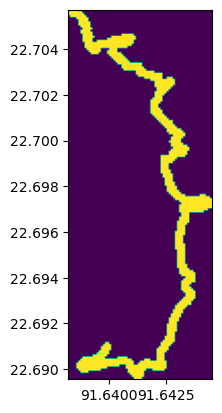

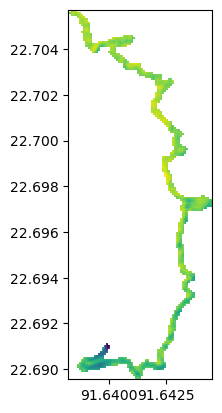

<Axes: >

In [64]:
ruposhi_pred = r"C:\Users\user\OneDrive\MS thesis\Result\test_features_ruposhi_stream_predicted.tif"
rp_main = r"C:\Users\user\OneDrive\MS thesis\Result\GEE\All streams image with Indices\Ruposhi_nd_vi_mi_wi_2022.tif"

import rasterio as rs 
from rasterio.plot import show 
img = rs.open(roi)
show(img)
img2 = rs.open(rp_main)
show(img2)